In [1]:
# import required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Period for %K calculation
k_period = 9
# Period for %D calculation (Fast %D and Slow %K)
d_period = 3

In [3]:
def data_wrangle(path, droped_columns):
    """ A method that will clean the original dataset, 
        restructure the dataset and fill the missing values.
        
        input
        -----
        path: data path 
        dropped_columns: columns to be dropped"""
    
    # read the dataset through the path
    df=pd.read_csv(path, index_col=0, parse_dates=True)
    # drop the unnecessary columns that are already specified 
    df = df.drop(columns=droped_columns)
    
    # return the dataframe
    return df

In [4]:
df_one_year_data = data_wrangle('data/gold_one_year.csv', droped_columns=['Adj Close', 'Volume'])

In [5]:
df_one_year_data.head(10)

,Open,High,Low,Close
Date,,,,
2023-07-24,1965.300049,1965.500000,1960.300049,1960.300049
2023-07-25,1953.000000,1962.500000,1953.000000,1962.099976
2023-07-26,1966.199951,1972.000000,1966.199951,1968.900024
2023-07-27,1945.400024,1945.400024,1945.400024,1945.400024
2023-07-28,1945.500000,1962.199951,1944.199951,1960.400024
2023-07-31,1959.199951,1971.599976,1950.000000,1970.500000
2023-08-01,1964.900024,1965.400024,1940.699951,1940.699951
2023-08-02,1948.400024,1953.599976,1933.199951,1937.400024
2023-08-03,1934.199951,1936.500000,1928.000000,1932.000000


In [6]:
# Calculate the lowest low and highest high over the lookback period
df_one_year_data['Highest High'] = df_one_year_data['High'].rolling(window=k_period).max()
df_one_year_data['Lowest Low'] = df_one_year_data['Low'].rolling(window=k_period).min()

In [7]:
# Calculate Fast %K
df_one_year_data['Fast %K'] = (df_one_year_data['Close'] - df_one_year_data['Lowest Low']) / (df_one_year_data['Highest High'] - df_one_year_data['Lowest Low']) * 100

In [8]:
# Calculate Fast %D (Simple Moving Average of Fast %K)
df_one_year_data['Fast %D'] = df_one_year_data['Fast %K'].rolling(window=d_period).mean()

In [9]:
# Calculate Slow %K (which is the same as Fast %D)
#df_one_year_data['Slow %K'] = df_one_year_data['Fast %D']

In [10]:
# Calculate Slow %D (Simple Moving Average of Slow %K)
df_one_year_data['Slow %D'] = df_one_year_data['Fast %D'].rolling(window=d_period).mean()

In [11]:
# Display the first 20 results
print(df_one_year_data.head(20))

                   Open         High          Low        Close  Highest High  \
Date                                                                           
2023-07-24  1965.300049  1965.500000  1960.300049  1960.300049           NaN   
2023-07-25  1953.000000  1962.500000  1953.000000  1962.099976           NaN   
2023-07-26  1966.199951  1972.000000  1966.199951  1968.900024           NaN   
2023-07-27  1945.400024  1945.400024  1945.400024  1945.400024           NaN   
2023-07-28  1945.500000  1962.199951  1944.199951  1960.400024           NaN   
2023-07-31  1959.199951  1971.599976  1950.000000  1970.500000           NaN   
2023-08-01  1964.900024  1965.400024  1940.699951  1940.699951           NaN   
2023-08-02  1948.400024  1953.599976  1933.199951  1937.400024           NaN   
2023-08-03  1934.199951  1936.500000  1928.000000  1932.000000   1972.000000   
2023-08-04  1934.900024  1945.000000  1920.000000  1939.599976   1972.000000   
2023-08-07  1941.000000  1941.000000  19

In [12]:
# Display the tail 20 results
print(df_one_year_data.tail(20))

                   Open         High          Low        Close  Highest High  \
Date                                                                           
2024-06-26  2307.899902  2314.399902  2298.000000  2299.199951   2354.000000   
2024-06-27  2296.800049  2329.000000  2295.000000  2324.500000   2354.000000   
2024-06-28  2325.399902  2338.300049  2319.000000  2327.699951   2354.000000   
2024-07-01  2323.800049  2329.699951  2321.699951  2327.600098   2354.000000   
2024-07-02  2330.699951  2334.600098  2323.000000  2323.000000   2354.000000   
2024-07-03  2330.899902  2361.600098  2330.899902  2359.800049   2361.600098   
2024-07-05  2354.899902  2388.500000  2354.899902  2388.500000   2388.500000   
2024-07-08  2381.699951  2383.800049  2352.800049  2355.199951   2388.500000   
2024-07-09  2363.100098  2363.699951  2360.100098  2360.100098   2388.500000   
2024-07-10  2366.300049  2377.000000  2365.800049  2372.199951   2388.500000   
2024-07-11  2378.699951  2416.699951  23

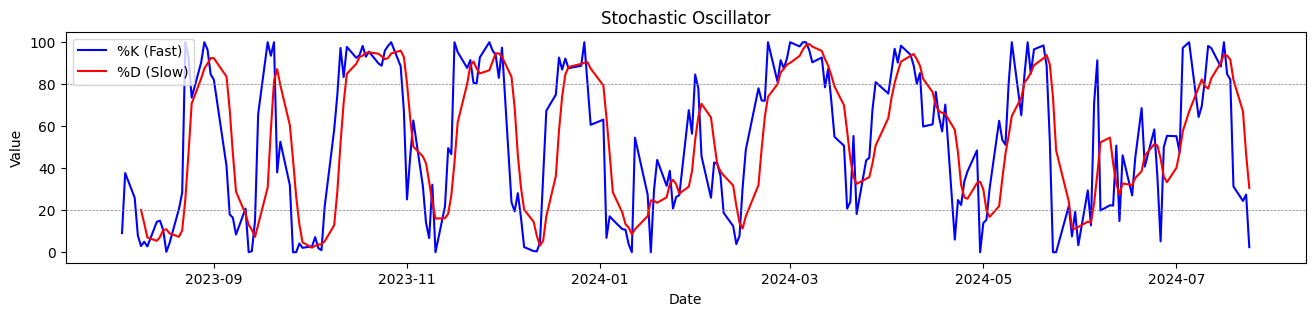

In [25]:
# Plotting
plt.figure(figsize=(16, 3))

# Plot Fast %K and Fast %D
plt.plot(df_one_year_data.index, df_one_year_data['Fast %K'], label='%K (Fast)', color='blue')
#plt.plot(df_one_year_data.index, df_one_year_data['Fast %D'], label='%D (Fast)', color='red')

# Plot Slow %K and Slow %D
#plt.plot(df_one_year_data.index, df_one_year_data['Slow %K'], label='%K (Slow)', color='green')
plt.plot(df_one_year_data.index, df_one_year_data['Slow %D'], label='%D (Slow)', color='red')

# Add overbought and oversold lines
plt.axhline(y=80, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=20, color='gray', linestyle='--', linewidth=0.5)

# Adding labels and title
plt.title('Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left')

# Show plot
plt.show()

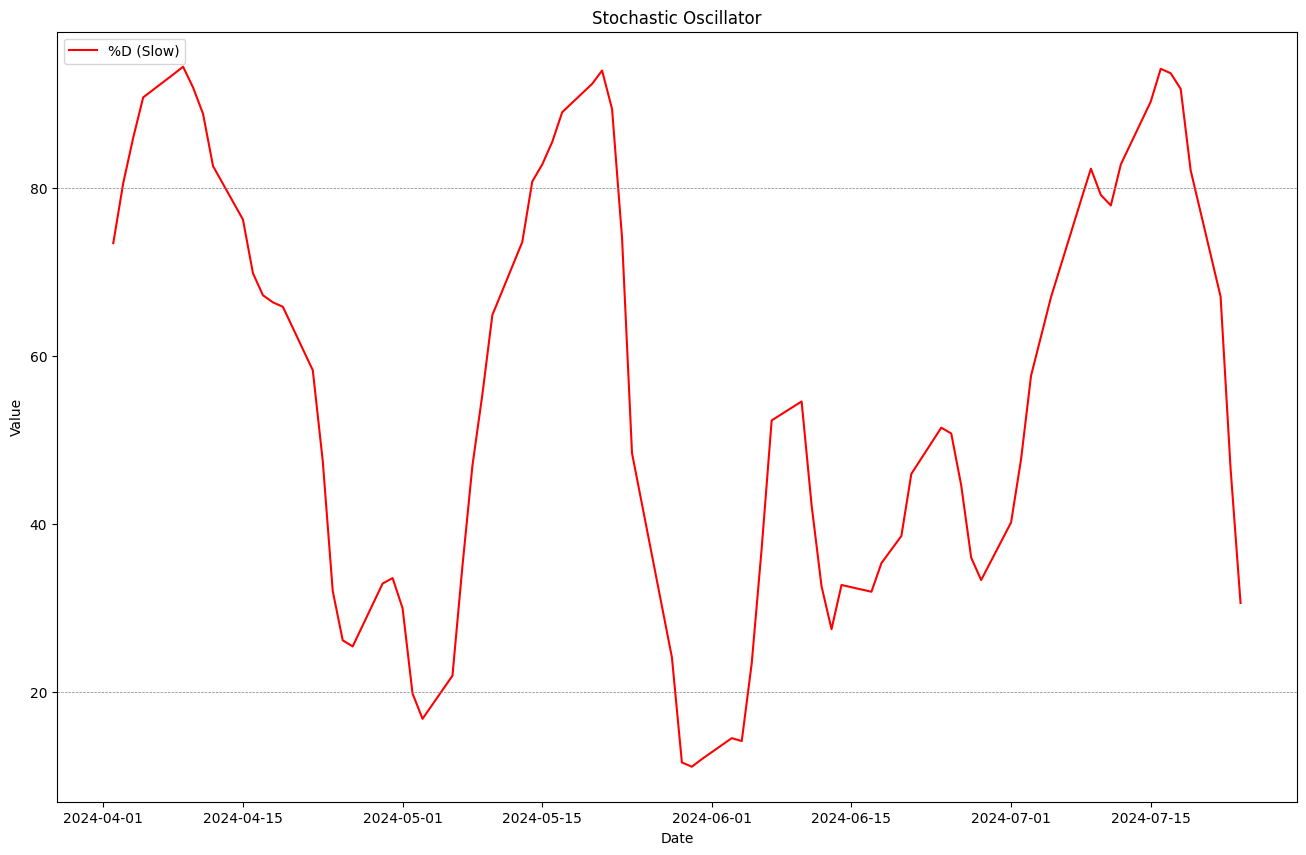

In [28]:
# Filter data to include only dates from April 2, 2024, to July 26, 2024
start_date = '2024-04-02'
end_date = '2024-07-26'
df_filtered = df_one_year_data[start_date:end_date]

# Plotting
plt.figure(figsize=(16, 10))

# Plot Fast %K and Fast %D
#plt.plot(df_filtered.index, df_filtered['Fast %K'], label='%K (Fast)', color='blue')

# Plot Slow %K and Slow %D
plt.plot(df_filtered.index, df_filtered['Slow %D'], label='%D (Slow)', color='red')

# Add overbought and oversold lines
plt.axhline(y=80, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=20, color='gray', linestyle='--', linewidth=0.5)

# Adding labels and title
plt.title('Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left')

# Show plot
plt.show()